<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/IMT_ex_Htestes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Escolha os testes mais adequados aqui

### **Testes de normalidade**

* Pressupostos: não há
* Foco: Normalidade

> * **Shapiro-Wild**, `shapiro(a)`, *H0 = Normal*

> * **Levene**, `levene(a,b)`, *H0 = Variâncias Iguais*

### **Testes paramétricos**

* Pressupostos: normalidade, continuidade, homocedasticidade
* Foco: Comparação de Médias

> * **ttest**, `ttest_ind(a,b,alternative="two-sided"|"greater"|"less")`, *distribuição t-Student, amostras*

> * **ztest**, `ztest(a,b,alternative="two-sided"|"greater"|"less")`, *distribuição normal, população*

> * **ttest_1samp**, `ttest_1samp(a,valor,alternative="two-sided"|"greater"|"less")`, *uma única amostra*

> * **ttest_rel**, `ttest_rel(a,b,alternative="two-sided"|"greater"|"less")`, *amostras pareadas*

> * **t de Welch**, `ttest_ind(a,b,equal_var=False)`, *variâncias ou amostras de tamanho diferente*


### **Testes não paramétricos**

* Pressupostos: não pressupõe nenhuma distribuição dos dados
* Foco: Comparação de Medianas e Distribuições iguais

> * **Wilcoxon**, `wilcoxon(a,b,alternative="two-sided"|"greater"|"less")`, * amostras têm medianas iguais? amostras de mesmo tamanho.*

> * **Mann-Whitney U**, `mannwhitneyu(a,b,alternative="two-sided"|"greater"|"less")`, *amostras de tamanho diferente, amostras têm distribuições iguais?*

### **Teste $\chi^2$**

* Pressupostos: variáveis categóricas
* Foco: variáveis independentes? (H0)

> * **chisquare**, `chi2_contingency(contingency_table)`, *empregue `pd.crosstab()` para gerar tabelas de contigência. $M \times N$-classes podem ser empregadas.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = 'https://github.com/Rogerio-mack/IMT_CD_2025/raw/main/data/'


In [ ]:
#@markdown gera_df_stats_latex
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

# **CASE: Treinamento**

Você está interessado em saber se um treinamento realizado com os funcionários da sua companhia será de fato efetivo para diminuir o tempo de realização de uma determinada tarefa realizada pelos funcionários. Você então coleta 30 amostras do tempo dessa tarefa para os funcionários, antes e depois do treinamento.



In [ ]:
df = pd.read_csv(path + 'task_before_after.csv',index_col=0)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
After Hours,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
Before Hours,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00
After Min,14.64,58.02,56.29,3.17,40.72,51.09,48.63,58.78,9.89,29.93,...,5.57,4.28,35.91,51.02,53.69,47.79,53.19,46.22,17.76,13.23
Before Min,13.42,44.20,56.20,6.38,14.60,17.13,21.64,3.23,10.58,51.10,...,56.87,25.22,0.73,4.80,8.86,3.78,45.53,51.10,11.56,21.42


# Q0.

Antes de tudo verifique os pressupostos dos testes paramétricos. Faça gráficos de distribuição e o `qqplot`.

Qual a conclusão dos testes? Que testes devemos **idealmente** aplicar? Paramétricos ou não paramétricos.



# Q1.

Selecione o teste adequado e verifique se o treinamento:

a. Altera o tempo para realização da tarefa

b. De fato, reduz o tempo para realização da tarefa



# Q2.

Verifique as mesmas hipóteses acima, no caso de:

a. O tempo após o treinamento ser apenas 3% maior. As conclusões são as mesmas?

b. Se a amostra não fosse pareada, mas de 30 funcionários quaisquer. Ainda assim teríamos a mesma conclusão? Você pode concluir que o teste não pareado pode concluir que os tempos são menores quando o teste pareado não?

c. As médias antes ou depois têm média estatisticamente iguais a 60min?



# **CASE: Game Analysis**

Um pesquisador está investigando a experiência de usuários em um jogo com diferentes dispositivos. Para isso ele selecionou alguns alunos da Universidade para testar os jogos. Cada jogador responde um questionário prévio com informações do seu perfil, realiza uma ou até 3 jogadas com os dispositivos *Skate*, *Joystick* e *Teclado*.

In [ ]:
df_games = pd.read_csv(path + 'df_games.csv')
df_pre_games_Q = pd.read_csv(path + 'df_pre_games_Q.csv')

display(df_games.head())
display(df_pre_games_Q.head())

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,2,12.44,12.44,skate
1,21505616,13,42.01,54.45,skate
2,21505616,26,49.09,103.54,skate
3,32143621,0,5.45,5.45,skate
4,32143621,3,13.99,19.44,skate


,Carimbo de data/hora,RA,Data de nascimento,Gênero,Frequência que anda de skate,Frequência que usa jogos de computador,Frequência que usa jogos de console (Xbox / Playstation / Wii),Frequência que usa jogos em dispositivos móveis (smartphone e/ou tablet),Gênero de jogo preferido
0,2023-08-21 16:47:52.279,42118816,2003-06-07,Feminino,Nunca,Regularmente (algumas vezes por semana),Regularmente (algumas vezes por semana),Nunca,"Ação e aventura, RPG, Simulação, Corrida, Estr..."
1,2023-08-22 13:49:56.703,42145333,2000-11-26,Masculino,Raramente (algumas vezes por ano),Regularmente (algumas vezes por semana),Raramente (algumas vezes por ano),Regularmente (algumas vezes por semana),"Ação e aventura, RPG, Estratégia"
2,2023-08-22 14:15:17.455,42326321,2004-11-29,Masculino,Nunca,Ocasionalmente (algumas vezes por mês),Raramente (algumas vezes por ano),Raramente (algumas vezes por ano),Esporte
3,2023-08-22 14:40:49.151,32339623,2004-07-13,Masculino,Nunca,Frequente (todos os dias),Regularmente (algumas vezes por semana),Raramente (algumas vezes por ano),"Ação e aventura, RPG, Estratégia, MOBA"
4,2023-08-22 15:08:53.471,42305535,2005-09-09,Masculino,Nunca,Ocasionalmente (algumas vezes por mês),Nunca,Ocasionalmente (algumas vezes por mês),RPG


# Q3.

**Há diferença de desempenho (pontuação) entre homens e mulheres no jogo?**
1. Crie uma função `plot_distribution(df,hue)` que produz os gráficos de distribuição das pontuações por gênero ou disposito (`hue`) como abaixo.
2. Produza uma tabela como abaixo, com a análise da pontuação de homens e mulheres por dispositivos empregando o teste adequado (*SeuTeste* $=$ substitua pelo nome do seu teste na tabela).




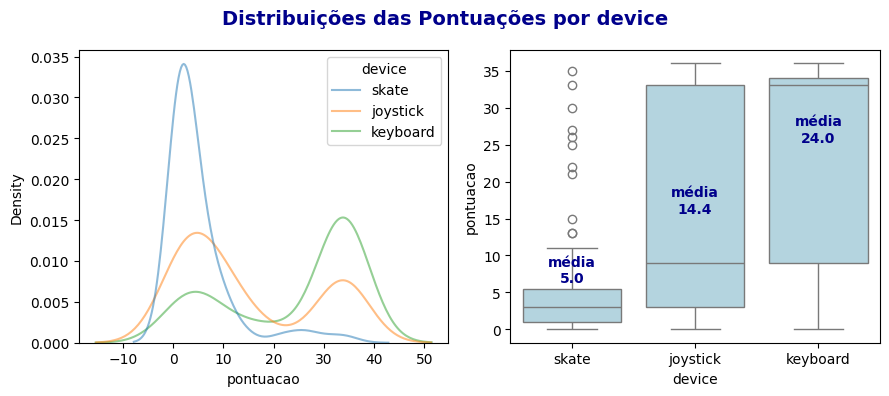

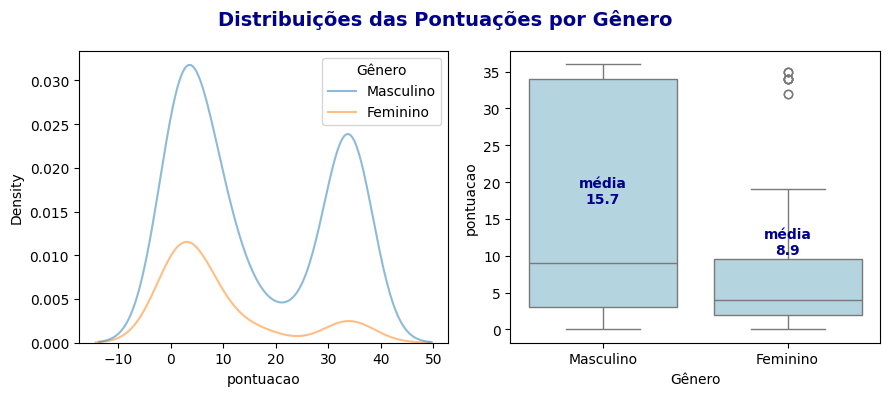

In [ ]:
plot_distribution(df,'device')
plot_distribution(df,'Gênero')

In [ ]:
# fake results...

latex_results_scores = gera_df_stats_latex(results,'Game Analysis')
display(Latex(latex_results_scores))

<IPython.core.display.Latex object>